# Model Selection : Random Forest
This part aims to assess the performances of the random forest model

In [2]:
library(randomForest)
training_set <- read.csv("../Data/PreProcess/processed_training_data_split.csv")
validation_set <- read.csv("../Data/PreProcess/processed_verification_data_split.csv") # load training and validation sets

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [3]:
column_to_drop<-c("X.1","X","wind.powered","dam","None","X40")
# Dropped "X.1","X" because they just represent the row number
# Also dropped "wind.powered","dam","None" and "X40" because they mean decrease accuracy was 0
training_set<-training_set[,!(names(training_set) %in% column_to_drop)] # drop the desired columns on training set
validation_set<-validation_set[,!(names(validation_set) %in% column_to_drop)] # drop the desired columns on validation set

## Model Setting and Training : 

In [3]:
training_set$id = factor(training_set$id) 
classifierRF = randomForest(id ~ ., data=training_set, ntree=400,  mtry=18, importance=TRUE)
save(classifierRF,file = "4-Models/random_forest.RData")
#BELOWN IS PUT IN COMMENT THE RESULTS OF PARAMETERS TWEAKING

#bench (funder, installer and  ward dropped)
#tree : 100 , split : 8 , error rate : 22.36% -> ~90% error rate at functional needs repair (worst class) (77% accuracy on val set)
#tree : 200 , split : 8 , error rate : 22.43%
#tree : 80 , split : 8, error rate : 22.49%  
#tree : 100 , split : 10, error rate : 21.84%
#tree : 120 , split : 10, error rate : 21.82%
#tree : 150 , split : 12, error rate : 21.47%  -> ~83% error rate ..... (78% acc. on val. set)
#tree : 120 , split : 15, error rate : 21.35% -> ~80% error rate at functional needs repair 
#tree : 250, split : 15, error rate : 21.35% -> ~80% error rate at functional needs repair 
#tree : 250, split : 8, error rate : 22.26% -> ~90% error rate at functional needs repair
#tree : 120, split : 20, error rate : 21.21% -> ~77% error rate at functional needs repair
#tree : 120, split : 35, error rate : 21.59% -> ~75% error rate at functional needs repair (78% accuracy on validation set)
#tree : 200, split : 25, error rate : 21.13% -> ~75% error rate at functional needs repair (78% acc. on val. set-)
#tree : 250, split : 28, error rate : 21.12% -> ~75% error rate at functional needs repair (78% acc. on val. set-)
#tree : 500, split : 25, error rate : 21.2% -> ~76% error rate at functional needs repair (78 % acc. on val. set-)
#(error rate = OOB)

# increasing tree number decreases the variance and keeps the bias constant -> good way to avoid overfitting

# bench with classified funder (big/small):
#tree : 450, split : 20, error rate : 20.99% -> 76% error rate at functional needs repair (78.4% acc. on val. set-)
#tree : 600, split : 18, error rate : 20.94% ->77 % error rate at functional needs repair (78.3% acc. on val. set-)
#tree : 450, split : 18, error rate : 20.88% -> 77% error rate at functional needs repair (78.52% acc. on val. set-)
#tree : 350, split : 18, error rate : 21% ->77 % error rate at functional needs repair (78.48% acc. on val. set-)
#tree : 350, split : 20, error rate : 21% ->76 % error rate at functional needs repair (78.4% acc. on val. set-)
#tree : 350, split : 23, error rate : 21.07% ->75.2 % error rate at functional needs repair (78.4% acc. on val. set-)
#tree : 350, split : 25, error rate : 21.1% -> 74.5% error rate at functional needs repair (78% acc. on val. set-)
#tree : 350, split : 29, error rate : 21.24% -> 73.5% error rate at functional needs repair (78.3% acc. on val. set-)
#tree : 350, split : 27, error rate : 21.29% -> 74.4% error rate at functional needs repair (78.3% acc. on val. set-)
#tree : 350, split : 32, error rate : 21.35% -> 73.5% error rate at functional needs repair (78.2% acc. on val. set-)


## For now : best parameters are at 450 trees and 18 random features per tree (wth funders)
### results -> 78.5% accuracy on validation set BUT still 77% of error rate for the 'functional needs repair' class
## Model Performances (OOB) :


Call:
 randomForest(formula = id ~ ., data = training_set, ntree = 400,      mtry = 18, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 400
No. of variables tried at each split: 18

        OOB estimate of  error rate: 20.86%
Confusion matrix:
                        functional functional needs repair non functional
functional                   23059                     363           2313
functional needs repair       2009                     799            592
non functional                4398                     188          13568
                        class.error
functional                0.1039829
functional needs repair   0.7650000
non functional            0.2526165

,functional,functional.needs.repair,non.functional,MeanDecreaseAccuracy,MeanDecreaseGini
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Trust,5.081902e-07,4.110760e-06,2.469650e-05,1.004969e-05,6.708907
SWC,-3.748957e-05,-2.015211e-06,8.712532e-05,1.292930e-05,5.614444
cattle.trough,1.719306e-04,-6.149107e-06,-5.834483e-05,7.069474e-05,9.570028
X9,2.358624e-04,6.818230e-05,6.013193e-05,1.563307e-04,12.657975
X8,1.556818e-04,9.549629e-04,2.914095e-04,2.656040e-04,20.966768
X7,2.785732e-04,3.578209e-05,4.565466e-04,3.296391e-04,16.319630
Other,7.808972e-04,2.563806e-04,1.956506e-04,5.184730e-04,38.780064
X24,9.247792e-04,7.571483e-05,3.610419e-05,5.227101e-04,15.821643
X99,1.902858e-04,9.946733e-05,1.196777e-03,5.698924e-04,21.970226


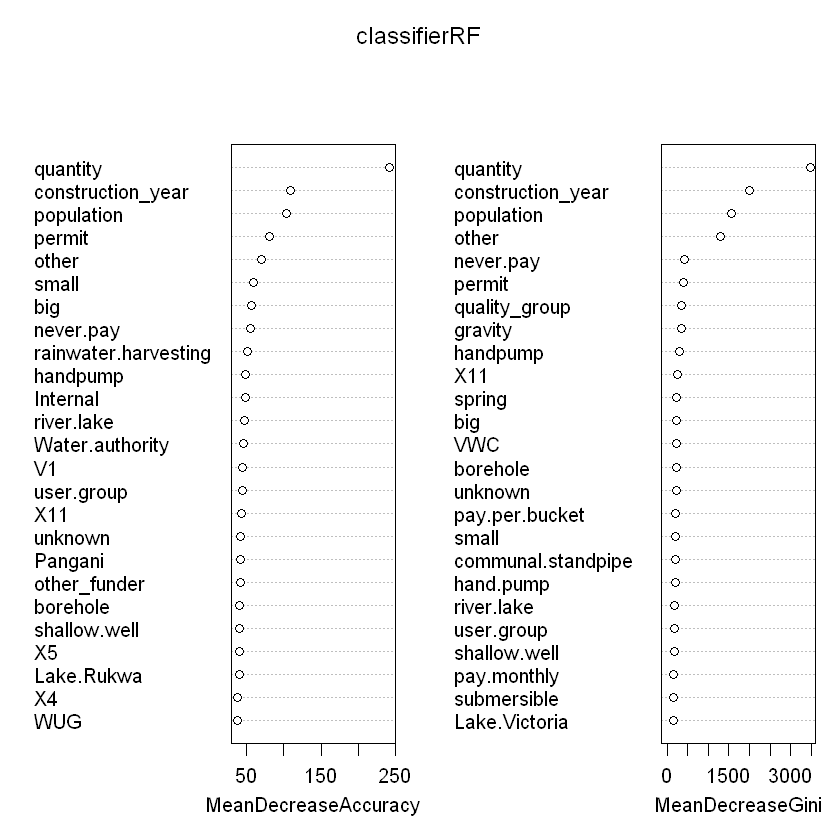

In [4]:
load("4-Models/random_forest.RData")
classifierRF # training outcome
varImpPlot(classifierRF, n.var=min(25, nrow(classifierRF$importance))) # plot mean decrease accuracy per variables
# --> high mean decrease accuracy = variable having a high impact on accuracy
imp<-data.frame(classifierRF$importance)
imp<-imp[order(imp$MeanDecreaseAccuracy),]
imp

### The variables having the highest (positive) impact on model performances are : *quantity*, *construction_year*, *population* and *permit*

## Confusion Matrix on Validation Set :

In [5]:
library(ROCR)
pred <- predict(classifierRF,validation_set) # Model prediction on validation set
dim(validation_set)
table(observed=validation_set$id,predicted=pred) # CONFUSION MATRIX ON VALIDATION SET

[1] 12111    80

                         predicted
observed                  functional functional needs repair non functional
  functional                    5785                     125            613
  functional needs repair        549                     224            144
  non functional                1153                      42           3475